In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
#test u function
def u(x):
    return 2*(1./(1.+np.exp(-x+10)))-1

def h(x):
    var =  (x-7)*(x-12)*-1
    var /=12
    return var*(np.sign(var)+1)

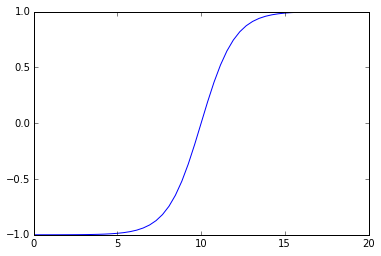

In [3]:
x = np.linspace(0, 6*np.pi, 50)
plt.plot(x,u(x))
plt.show()

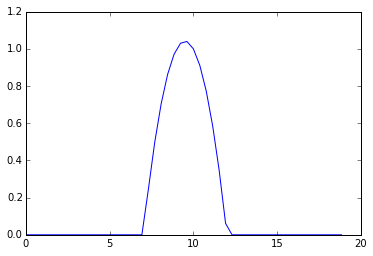

In [4]:
plt.plot(x,h(x))
plt.show()

In [9]:
eps_u = 2.
eps_h = 2.
eps = 2.
N = 30

def phi_u(r, eps_u):
    return np.exp(-eps_u**2 * r**2)

def phi_h(r, eps_h):
    return np.exp(-eps_h**2 * r**2)

In [10]:
#building the distances matrix
xi = np.linspace(0, 6*np.pi, N)
vi = xi.reshape((N,1))
D = np.abs(vi-xi)

In [11]:
#finding the initial weights
Gamma_h = np.linalg.solve(phi_h(D, eps), h(xi))
Gamma_u = np.linalg.solve(phi_u(D, eps), u(xi))
print Gamma_h
print Gamma_u

[ -3.78162003e-10   2.12152244e-09  -1.15099814e-08   6.23756183e-08
  -3.38016998e-07   1.83173082e-06  -9.92623940e-06   5.37907728e-05
  -2.91493775e-04   1.57944896e-03  -8.53203746e-03   4.19321823e-02
   4.33626323e-01   6.37639356e-01   7.54609824e-01   7.66311088e-01
   6.74133416e-01   4.88513178e-01   1.49650618e-01  -2.91765080e-02
   5.39388387e-03  -9.95417848e-04   1.83689041e-04  -3.38969159e-05
   6.25514085e-06  -1.15428747e-06   2.13005248e-07  -3.93052046e-08
   7.24474442e-09  -1.29137784e-09]
[-0.86929994 -0.7031663  -0.73373921 -0.7278674  -0.72851086 -0.72754969
 -0.72611548 -0.72330083 -0.71794984 -0.70779449 -0.68869188 -0.65333809
 -0.58986105 -0.48198828 -0.3152858  -0.09345437  0.14800404  0.35912776
  0.51163285  0.60775797  0.66344776  0.69419624  0.71073136  0.71950684
  0.72408681  0.72669952  0.72692092  0.73324433  0.7029106   0.86915164]


In [12]:
#initial shape parameters
Eps_h = np.array([eps_h]*N)
Eps_u = np.array([eps_u]*N)
print Eps_h
print Eps_u

[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]


In [13]:
#initial colocation parameters
Xi_h = np.linspace(0, 6*np.pi, N)
Xi_u = np.linspace(0, 6*np.pi, N)
print Xi_h
print Xi_u

[  0.           0.64998469   1.29996937   1.94995406   2.59993875
   3.24992343   3.89990812   4.54989281   5.1998775    5.84986218
   6.49984687   7.14983156   7.79981624   8.44980093   9.09978562
   9.7497703   10.39975499  11.04973968  11.69972437  12.34970905
  12.99969374  13.64967843  14.29966311  14.9496478   15.59963249
  16.24961717  16.89960186  17.54958655  18.19957123  18.84955592]
[  0.           0.64998469   1.29996937   1.94995406   2.59993875
   3.24992343   3.89990812   4.54989281   5.1998775    5.84986218
   6.49984687   7.14983156   7.79981624   8.44980093   9.09978562
   9.7497703   10.39975499  11.04973968  11.69972437  12.34970905
  12.99969374  13.64967843  14.29966311  14.9496478   15.59963249
  16.24961717  16.89960186  17.54958655  18.19957123  18.84955592]


In [14]:
#approximating function (approximation of u)
def u_app(x, Gamma, Xi, Eps):
    if type(x)==np.ndarray:
        #evaluate multiple points through broadcasting
        n = x.shape[0]
        return np.dot(phi(x.reshape((n,1))-Xi, Eps), Gamma)
    else:
        #evaluate a single point
        return np.dot(phi(x-Xi, Eps), Gamma)
    
def h_app(x, Gamma, Xi, Eps):
    if type(x)==np.ndarray:
        #evaluate multiple points through broadcasting
        n = x.shape[0]
        return np.dot(phi(x.reshape((n,1))-Xi, Eps), Gamma)
    else:
        #evaluate a single point
        return np.dot(phi(x-Xi, Eps), Gamma)

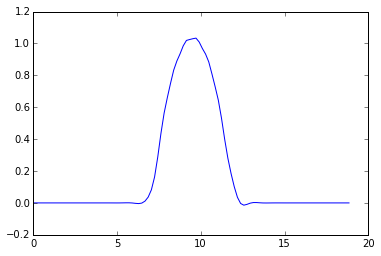

In [15]:
Nx = 100
x = np.linspace(0, 6*np.pi, Nx)
plt.plot(x, h_app(x, Gamma_h, Xi_h, Eps_h))
plt.show()

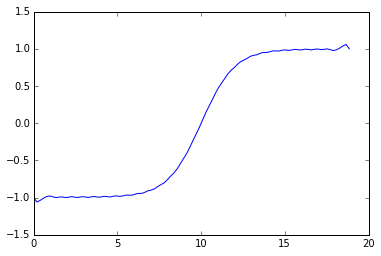

In [16]:
plt.plot(x, u_app(x, Gamma_u, Xi_u, Eps_u))
plt.show()

### Ecuaciones de evolución a utilizar

$$ \epsilon_h'(t) = 0 $$
$$ \gamma_h'(t) = 0 $$
$$ \xi_h'(t) = \frac{u \gamma _h(t) \epsilon _h(t){}^2+h \gamma _u(t) \epsilon _u(t){}^2}{\gamma _h(t) \epsilon _h(t){}^2}$$

$$ \epsilon_u'(t) = 0 $$
$$ \gamma_u'(t) = 0 $$
$$ \xi_u'(t) = \frac{g \gamma _h(t) \epsilon _h(t){}^2+u \gamma _u(t) \epsilon _u(t){}^2}{\gamma _u(t) \epsilon _u(t){}^2} $$

In [19]:
def dXi(Xi, t):
    m = len(Xi)
    Xi_h = Xi[:m/2]
    Xi_u = Xi[m/2:]
    xi_h_t = (u_app(Xi_u, Gamma_u, Xi_u, Eps_u)*Gamma_h*Eps_h**2 + h_app(Xi_h, Gamma_h, Xi_h, Eps_h)*Gamma_u*Eps_u**2)/(Gamma_h*Eps_h**2)
    xi_u_t = (g*Gamma_h*Eps_h**2 + u_app(Xi_u, Gamma_u, Xi_u, Eps_u)*Gamma_u*Eps_u**2)/(Gamma_u*Eps_u**2)
    return np.concatenate((xi_h_t, xi_u_t))

g = 9.8
Nt = 5000
t = np.linspace(0.,3.,Nt)

sol = odeint(dXi, np.concatenate((Xi_h, Xi_u)), t) #it gives Xi values in time

In [20]:
#solution at final time
plt.plot(x, w(x, Gamma, sol[-1], Eps))
plt.show()

NameError: name 'w' is not defined

In [13]:
#generating grids
X, T = np.meshgrid(x, t)

W = np.empty((Nt,Nx))
m = 0
for Xi in sol:
    W[m] = w(x, Gamma, Xi, Eps)
    m +=1

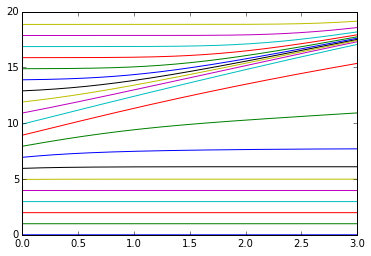

In [17]:
plt.plot(t, sol)
plt.show()

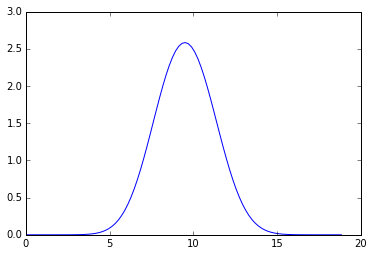

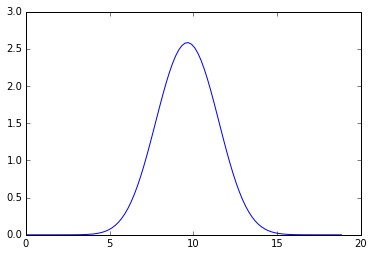

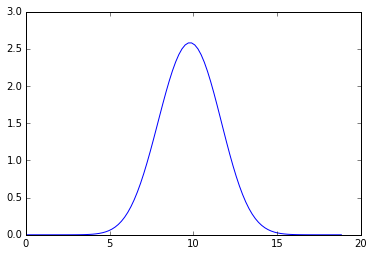

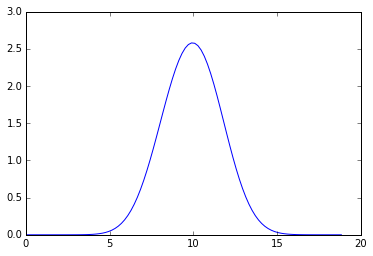

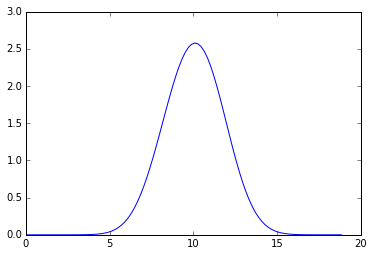

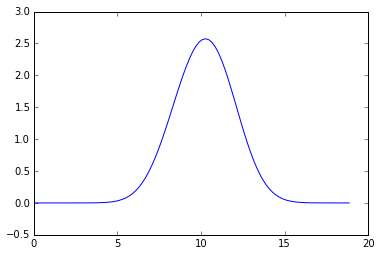

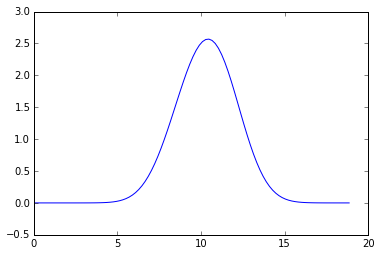

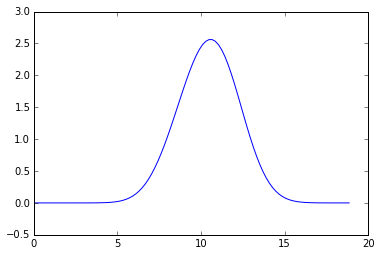

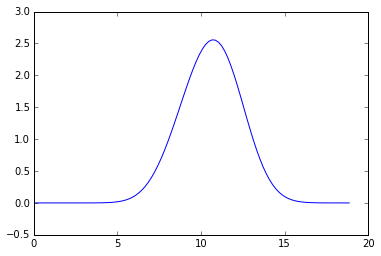

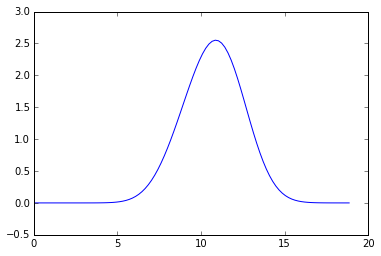

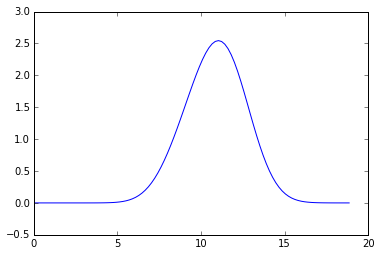

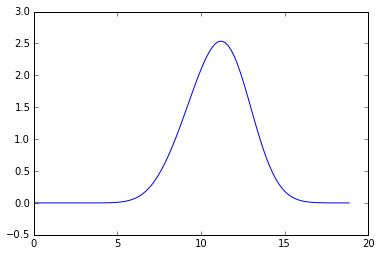

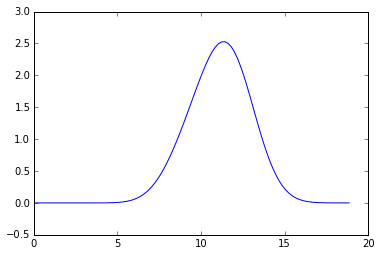

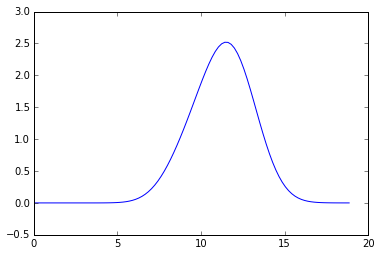

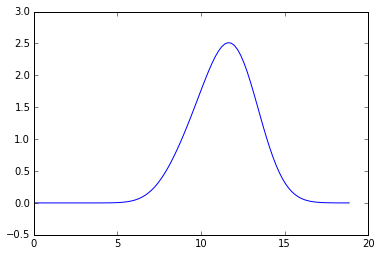

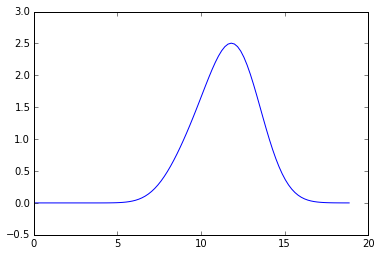

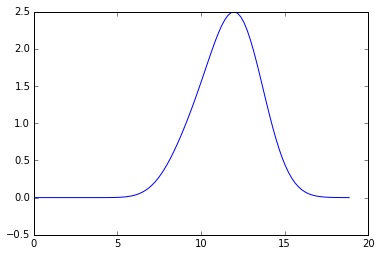

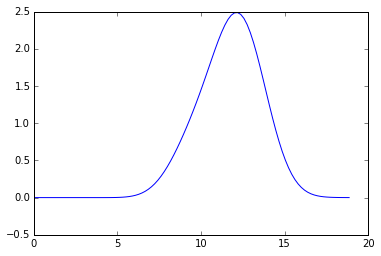

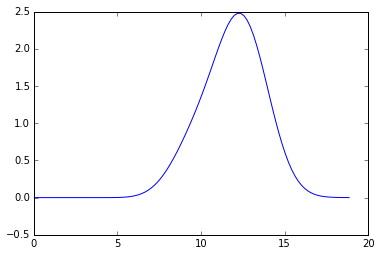

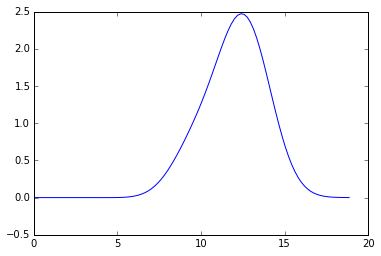

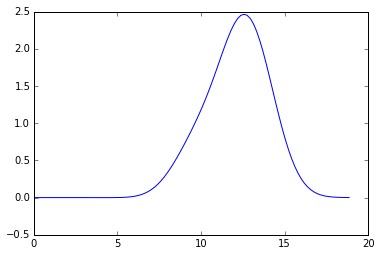

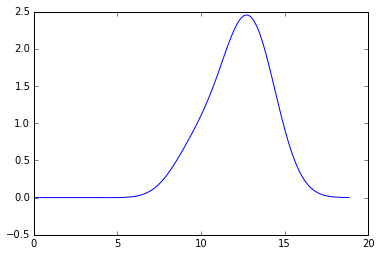

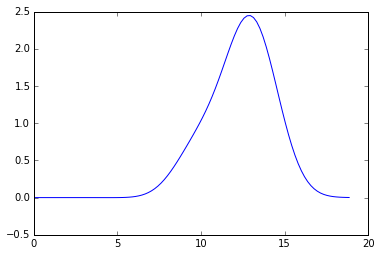

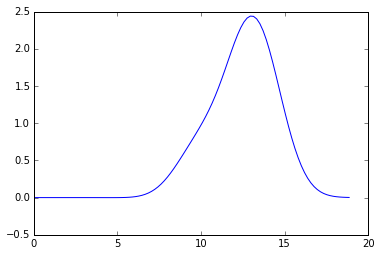

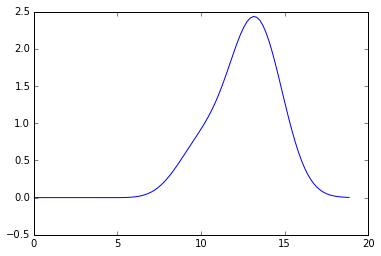

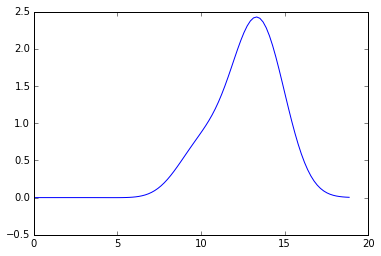

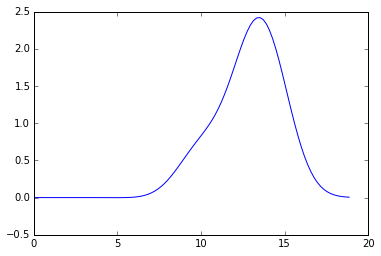

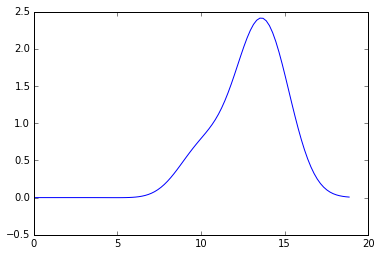

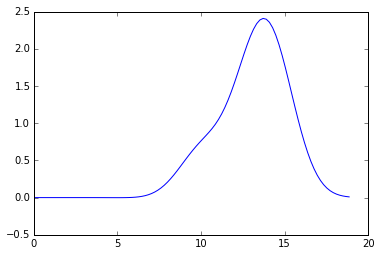

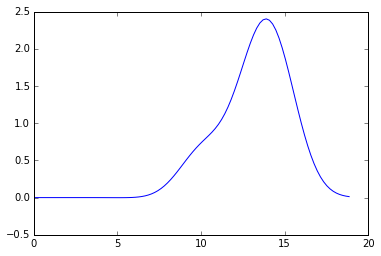

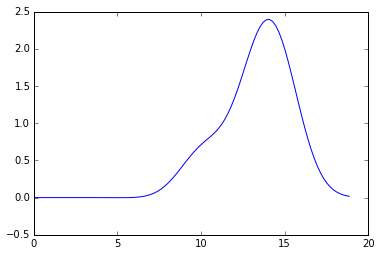

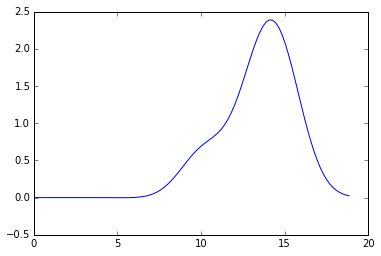

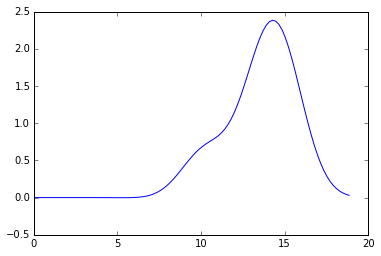

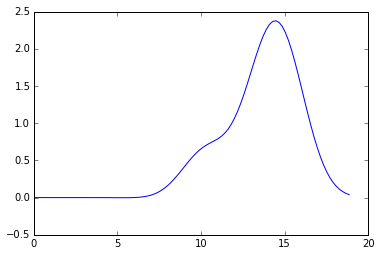

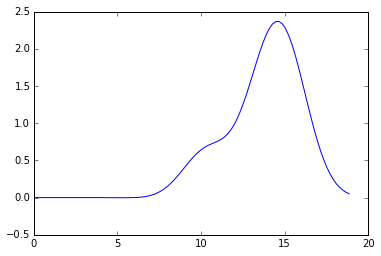

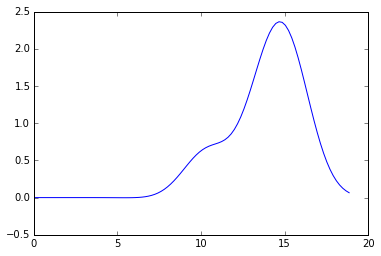

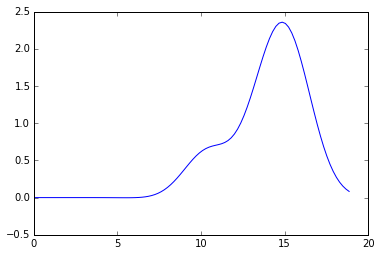

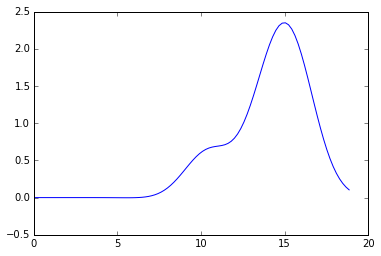

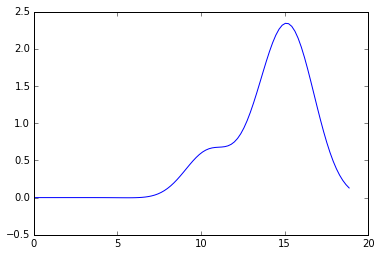

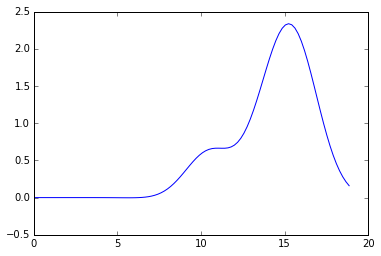

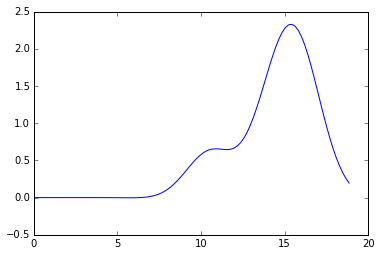

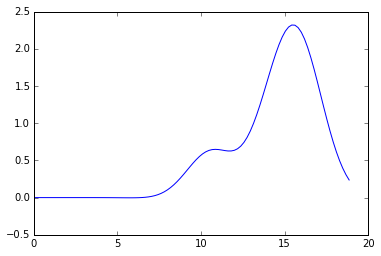

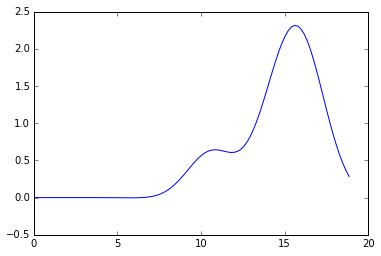

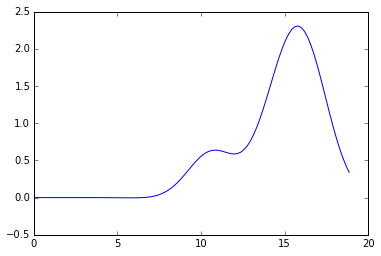

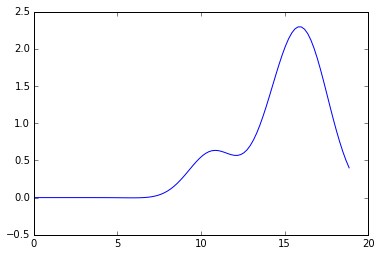

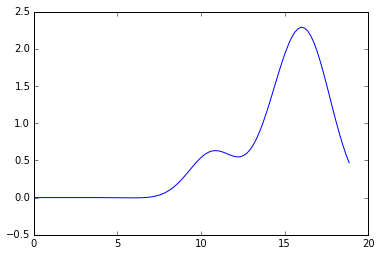

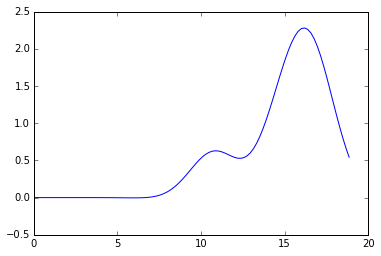

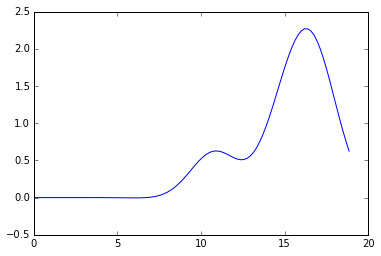

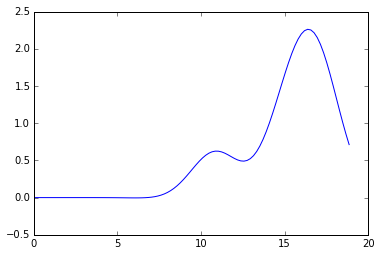

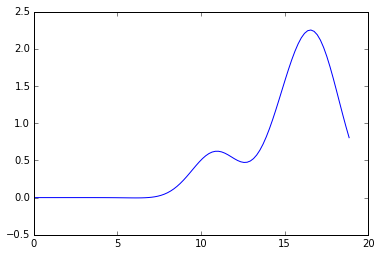

In [14]:
%matplotlib inline
m=0
while m<5000:
    plt.plot(x, w(x, Gamma, sol[m], Eps))
    plt.show()
    m+=100

In [ ]:
#3d plot
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, W, antialiased=False, linewidth=0)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('w')
#plt.contour(X, T, W)
plt.show()